In [74]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/seismic_data.csv')
df.head(3)

,Date(UTC),Latitude,Longitude,Depth,Magnitude
0,2024-03-27 05:08:28,-23.54,-68.21,148,5.4
1,2024-03-24 19:50:11,-19.47,-70.08,74,5.1
2,2024-03-13 09:30:06,-18.68,-69.52,114,5.1


In [75]:
df['Date'] = pd.to_datetime(df['Date(UTC)'])
df.drop(columns=['Date(UTC)'], inplace=True)
print(df)

      Latitude  Longitude  Depth  Magnitude                Date
0       -23.54     -68.21    148        5.4 2024-03-27 05:08:28
1       -19.47     -70.08     74        5.1 2024-03-24 19:50:11
2       -18.68     -69.52    114        5.1 2024-03-13 09:30:06
3       -28.91     -71.44     45        5.8 2024-02-14 01:31:42
4       -28.24     -71.32     44        5.7 2024-02-11 21:14:43
...        ...        ...    ...        ...                 ...
3621    -33.05     -71.06     69        5.2 2012-03-24 07:28:33
3622    -25.00     -69.75    100        5.0 2012-03-19 21:52:39
3623    -19.74     -69.25    101        5.3 2012-03-10 02:26:57
3624    -21.60     -70.06     47        5.3 2012-03-04 16:27:20
3625    -30.19     -71.45     35        5.6 2012-03-03 11:01:47

[3626 rows x 5 columns]


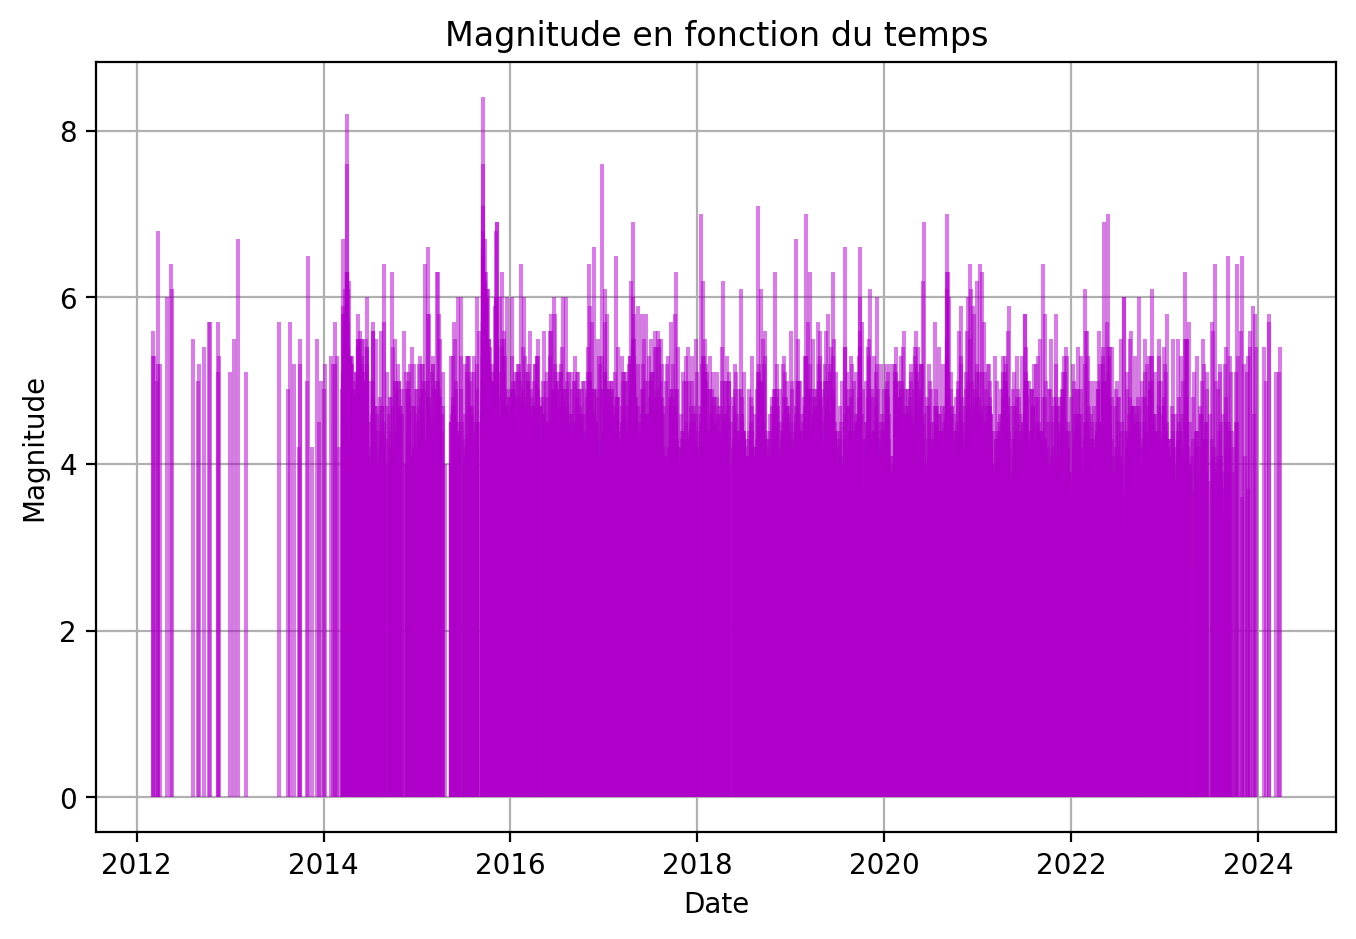

In [76]:
plt.figure(figsize=(8, 5), dpi=200)
plt.vlines(df['Date'], ymin=0, ymax=df['Magnitude'], color='#AE00C8', alpha=0.5)
plt.title('Magnitude en fonction du temps')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

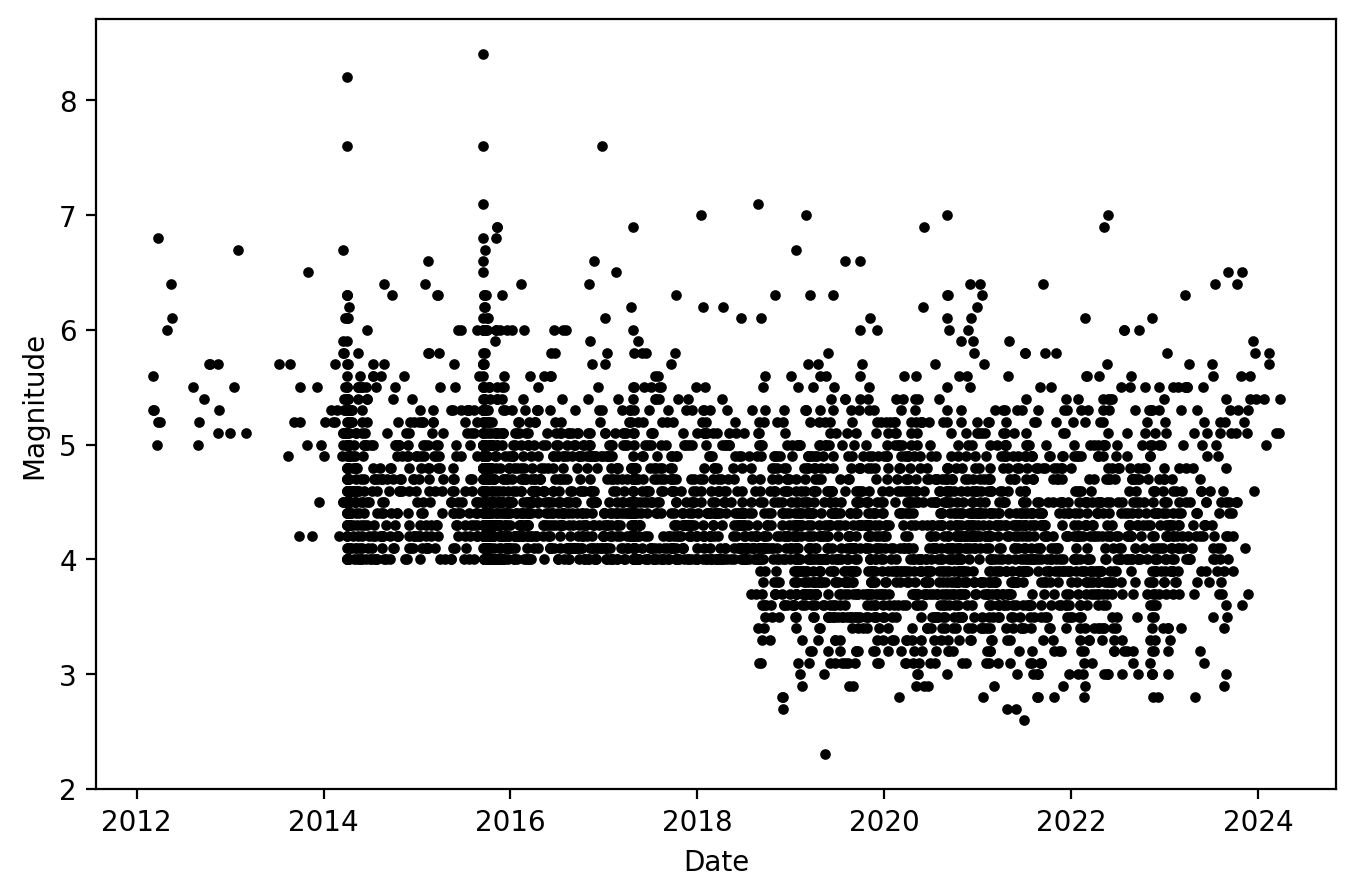

In [77]:
import matplotlib.pyplot as plt

# Tracer le graphique
plt.figure(figsize=(8, 5), dpi=200)
scatter = plt.scatter(df['Date'], df['Magnitude'], c='black', s=8)
plt.xlabel('Date')
plt.ylabel('Magnitude')

plt.show()


In [78]:
df['Magnitude'].min()

2.3

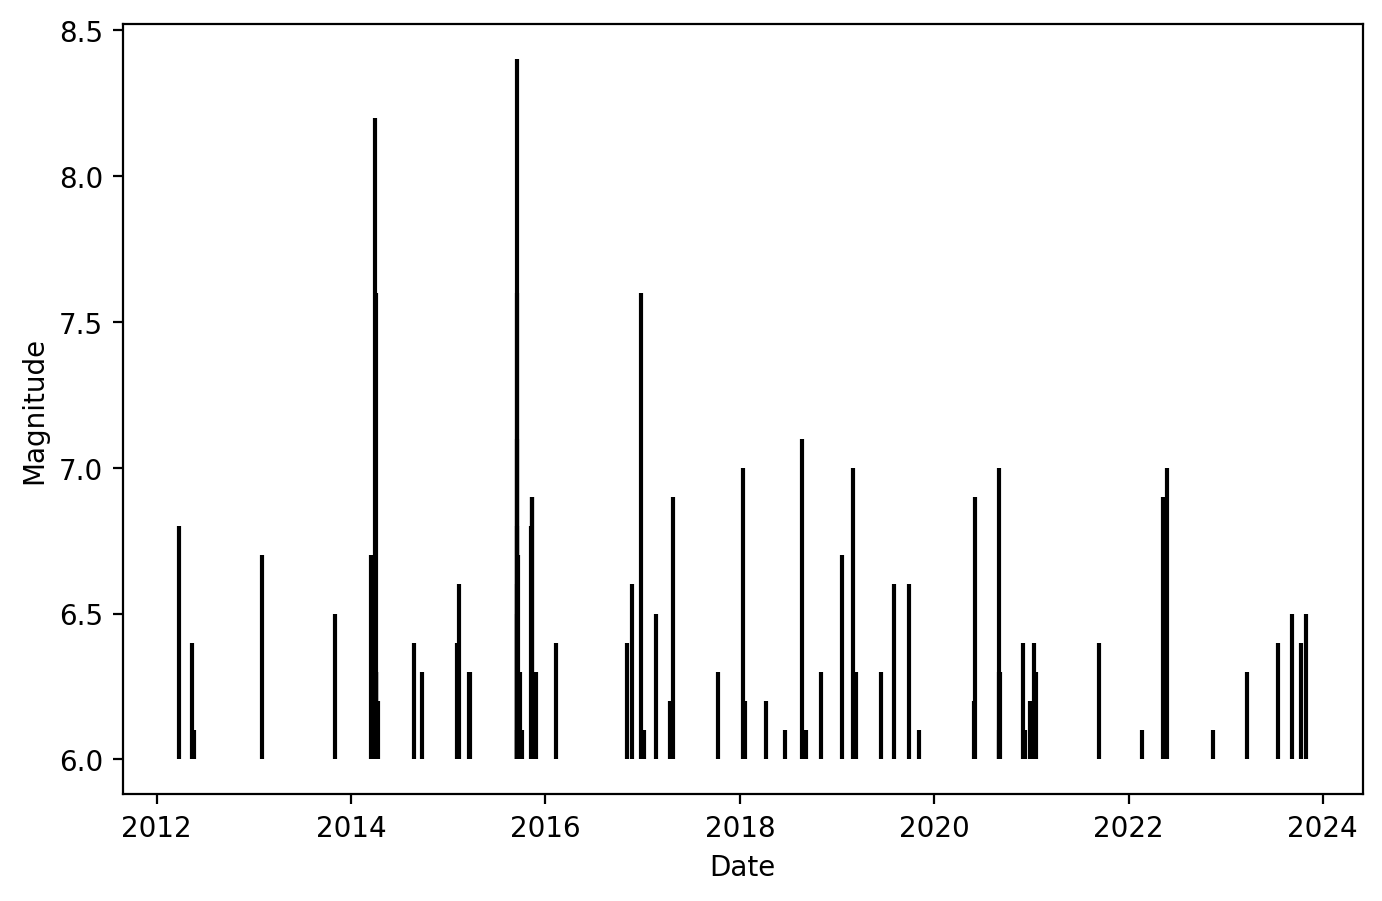

In [79]:
#df = df[df['Longitude']>-69]
#df = df[df['Latitude']>-20]
df = df[df['Magnitude']>6]
# Tracer la magnitude en fonction du temps
plt.figure(figsize=(8, 5), dpi=200)
plt.vlines(df['Date'], ymin=6, ymax=df['Magnitude'], color='black')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.show()

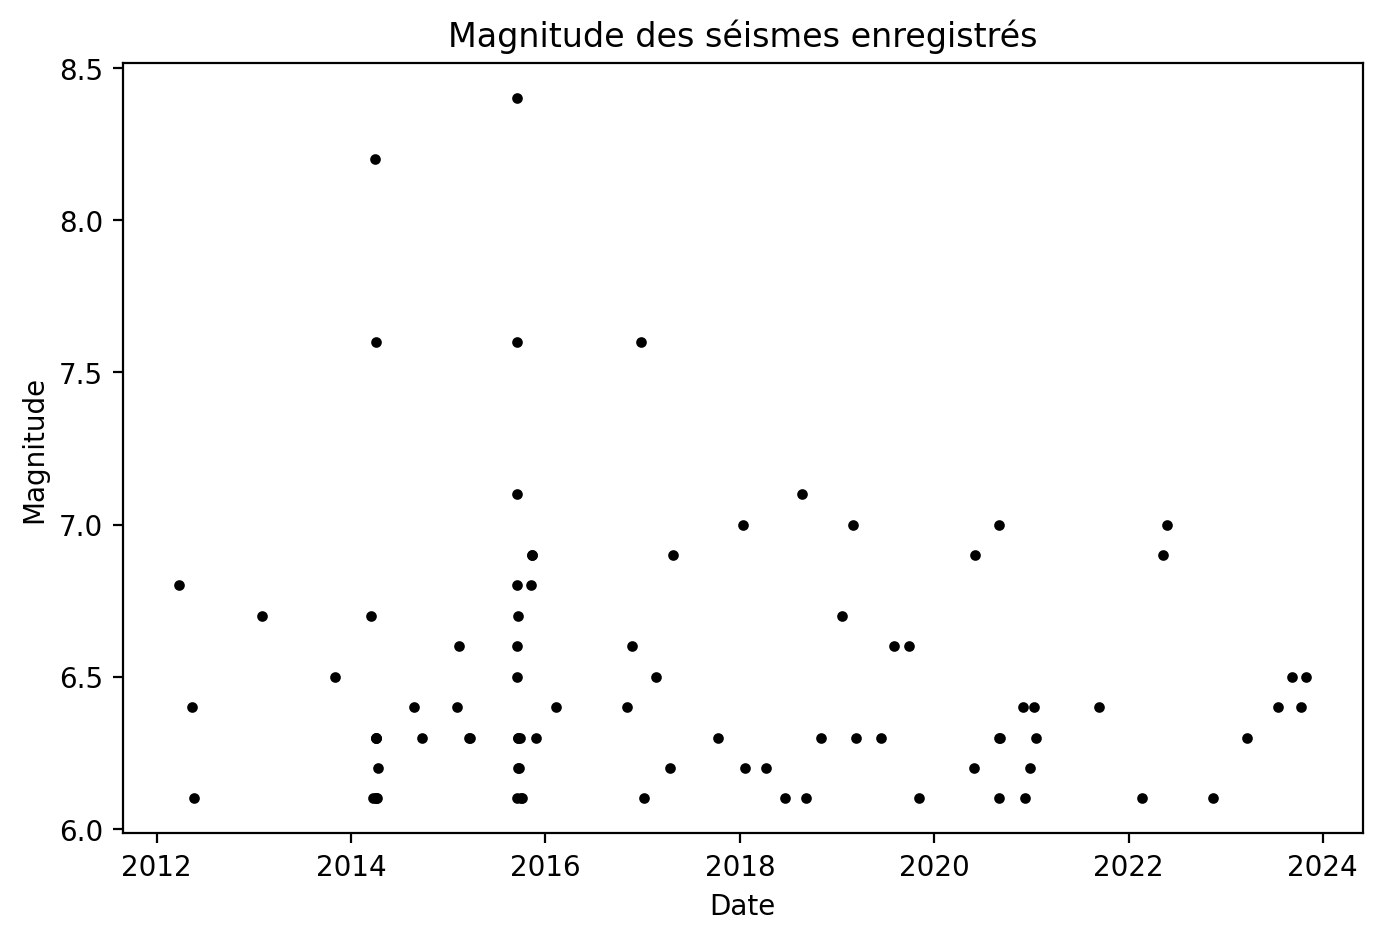

In [80]:
import matplotlib.pyplot as plt

# Tracer le graphique
plt.figure(figsize=(8, 5), dpi=200)
scatter = plt.scatter(df['Date'], df['Magnitude'], c='black', s=8)
plt.title('Magnitude des séismes enregistrés')
plt.xlabel('Date')
plt.ylabel('Magnitude')

plt.show()

In [81]:
# Trier le DataFrame par ordre chronologique si ce n'est pas déjà le cas
df.sort_values(by='Date', inplace=True)


In [82]:
df['Date']

3620   2012-03-25 22:37:06
3617   2012-05-14 10:00:40
3616   2012-05-19 08:35:09
3604   2013-01-30 20:15:41
3594   2013-10-31 23:03:58
               ...        
115    2023-03-22 16:00:31
62     2023-07-17 03:05:10
34     2023-09-06 23:48:05
23     2023-10-10 10:01:31
18     2023-10-31 12:33:43
Name: Date, Length: 85, dtype: datetime64[ns]

In [83]:
import pandas as pd

# Convertir le champ Date en objet datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

# Définir une référence temporelle (par exemple, le premier événement)
reference_time = df['Date'].min()
print(reference_time)

# Calculer les temps écoulés depuis la référence pour chaque événement en jours
df['Elapsed_Time'] = (df['Date'] - reference_time).dt.total_seconds() / (24 * 3600)

# Utiliser les temps écoulés en jours comme données d'entrée pour ajuster le processus de Hawkes
data = df['Elapsed_Time'].values


2012-03-25 22:37:06


In [84]:
data

array([   0.        ,   49.47469907,   54.4153125 ,  310.90179398,
        585.01865741,  720.9440162 ,  727.82145833,  737.04836806,
        738.13987269,  738.1709375 ,  738.28412037,  738.28413194,
        739.12552083,  739.12553241,  742.6293287 ,  746.05877315,
        880.99672454,  912.52717593, 1043.50883102, 1052.84737269,
       1087.82659722, 1092.26009259, 1270.01206019, 1270.01538194,
       1270.01863426, 1270.02710648, 1270.02880787, 1270.1277662 ,
       1270.23149306, 1272.27059028, 1272.59391204, 1274.29337963,
       1274.79365741, 1275.35825231, 1279.17652778, 1286.31015046,
       1288.74746528, 1321.37123843, 1325.13715278, 1325.17303241,
       1341.9328125 , 1416.08053241, 1684.73864583, 1700.93097222,
       1735.65644676, 1747.32878472, 1790.56469907, 1846.40459491,
       1855.95928241, 2024.33002315, 2120.4455787 , 2127.10386574,
       2206.4878125 , 2278.72981481, 2342.43542824, 2356.16818287,
       2411.98803241, 2491.12204861, 2531.42609954, 2545.26857

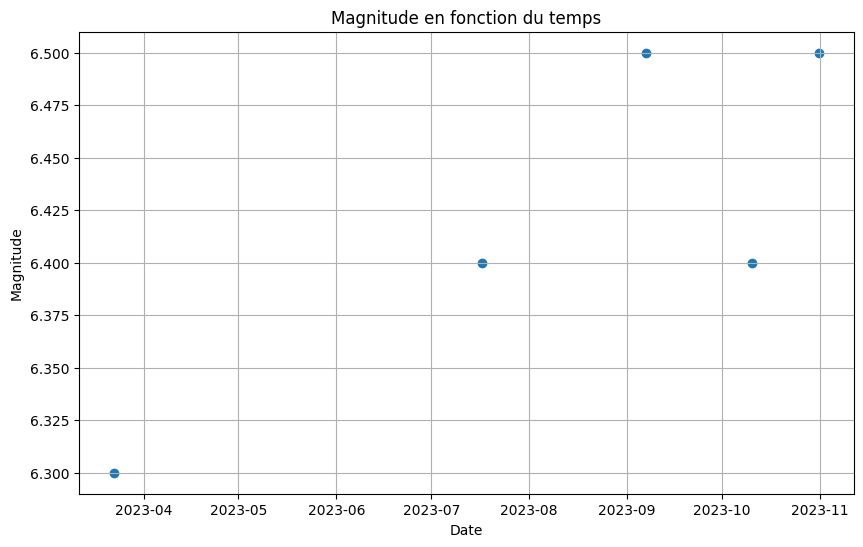

In [85]:
df = df[df['Date'].dt.year >= 2023]
# Tracer la magnitude en fonction du temps
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Magnitude'], marker='o', linestyle='-')
plt.title('Magnitude en fonction du temps')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [86]:
df = pd.read_csv('../data/Earthquakes.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head(30)

,Unnamed: 0,Date,Longitude,Latitude,Depth,Rms,Type,Magnitude,Location,EventID
0,0,2023-02-06 01:17:32,37.043,37.288,8.60,1.92,MW,7.7,Pazarcık (Kahramanmaraş),543428
1,1,2023-02-06 10:24:47,37.239,38.089,7.00,0.58,MW,7.6,Elbistan (Kahramanmaraş),543593
2,2,2023-02-06 01:28:16,36.920,37.304,6.20,0.21,MW,6.6,Nurdağı (Gaziantep),543431
3,3,2023-02-20 17:04:27,36.021,36.037,21.73,0.94,MW,6.4,Yayladağı (Hatay),551067
4,4,2023-02-06 12:02:11,36.478,38.071,17.04,0.93,MW,5.9,Göksun (Kahramanmaraş),543617
5,5,2023-02-20 17:07:34,35.978,36.186,6.64,0.92,MW,5.8,Samandağ (Hatay),551068
6,6,2023-02-06 10:51:30,38.151,38.305,10.40,0.69,MW,5.7,Yeşilyurt (Malatya),543599
7,7,2023-02-06 01:36:28,36.652,37.119,10.46,0.52,ML,5.7,İslahiye (Gaziantep),543430
8,8,2023-02-06 01:26:49,36.992,37.235,6.98,0.42,ML,5.6,Nurdağı (Gaziantep),543429
9,9,2023-02-06 10:35:57,37.954,38.181,6.85,0.61,ML,5.6,Doğanşehir (Malatya),543594


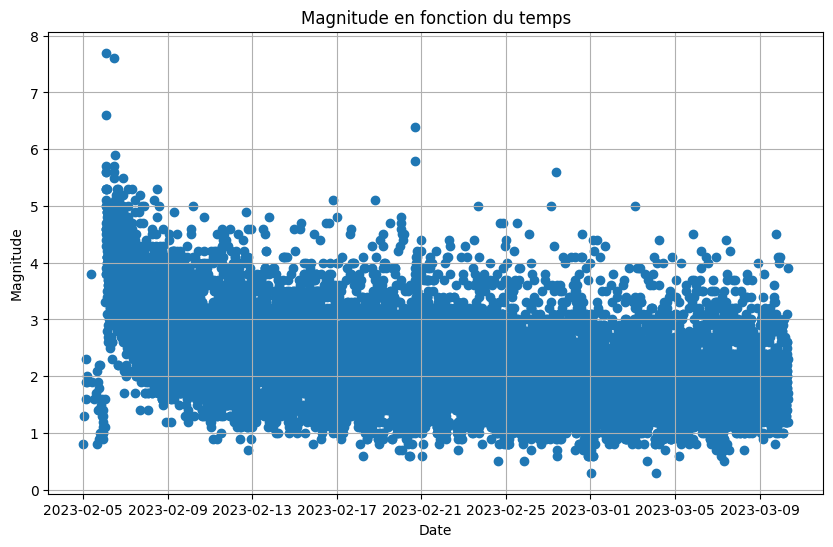

In [87]:
# Tracer la magnitude en fonction du temps
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Magnitude'], marker='o', linestyle='-')
plt.title('Magnitude en fonction du temps')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [88]:
# Comptez les occurrences de chaque valeur dans la colonne 'Location'
location_counts = df['Location'].value_counts()

# Affichez les différentes valeurs de 'Location' et le nombre d'occurrences associées
print("Valeurs de 'Location' et leur nombre d'occurrences :")
print(location_counts)

Valeurs de 'Location' et leur nombre d'occurrences :
Location
Göksun (Kahramanmaraş)                                      1641
Doğanşehir (Malatya)                                        1250
Dulkadiroğlu (Kahramanmaraş)                                1141
Türkoğlu (Kahramanmaraş)                                     961
Yeşilyurt (Malatya)                                          876
                                                            ... 
Ozurgeti, Guria (Gürcistan) - [42.25 km] Şavşat (Artvin)       1
Akdeniz - [08.16 km] Samandağ (Hatay)                          1
Deyrizor (Suriye) - [57.05 km] Akçakale (Şanlıurfa)            1
Akdeniz - [08.56 km] Arsuz (Hatay)                             1
Keban Barajı - [04.54 km] Merkez (Elazığ)                      1
Name: count, Length: 571, dtype: int64


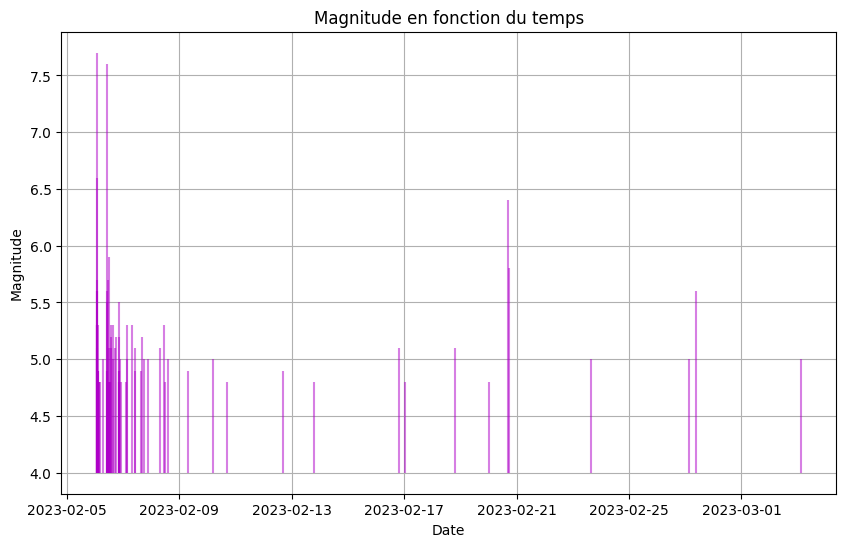

In [89]:
df = df[df['Magnitude']>4.7]

# Tracer la magnitude en fonction du temps
plt.figure(figsize=(10, 6))
plt.vlines(df['Date'], ymin=4, ymax=df['Magnitude'], color='#AE00C8', alpha=0.5)
plt.title('Magnitude en fonction du temps')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [90]:
import tick.hawkes as hk
import numpy as np

# Assuming you have the earthquake data stored in the 'data' variable

# Create a Hawkes process model
model = hk.SimuHawkesExpKernels(n_nodes=1, end_time=np.max(data))

# Fit the model to the data
model.fit(data)

# Generate simulated data from the fitted model
simulated_data = model.simulate()

# Plot the original data and the simulated data
plt.figure(figsize=(10, 6))
plt.scatter(data, np.zeros_like(data), marker='o', color='blue', label='Original Data')
plt.scatter(simulated_data, np.zeros_like(simulated_data), marker='x', color='red', label='Simulated Data')
plt.title('Hawkes Process')
plt.xlabel('Time')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'tick'